# Day 4.2 RNN Basic
------------
## Contents
1. RNN 모델의 입력 데이터 형태
2. RNN 모델 정의
  1. vanila RNN
  2. LSTM
  3. GRU
3. RNN을 이용한 분류기 구현
4. 연습문제

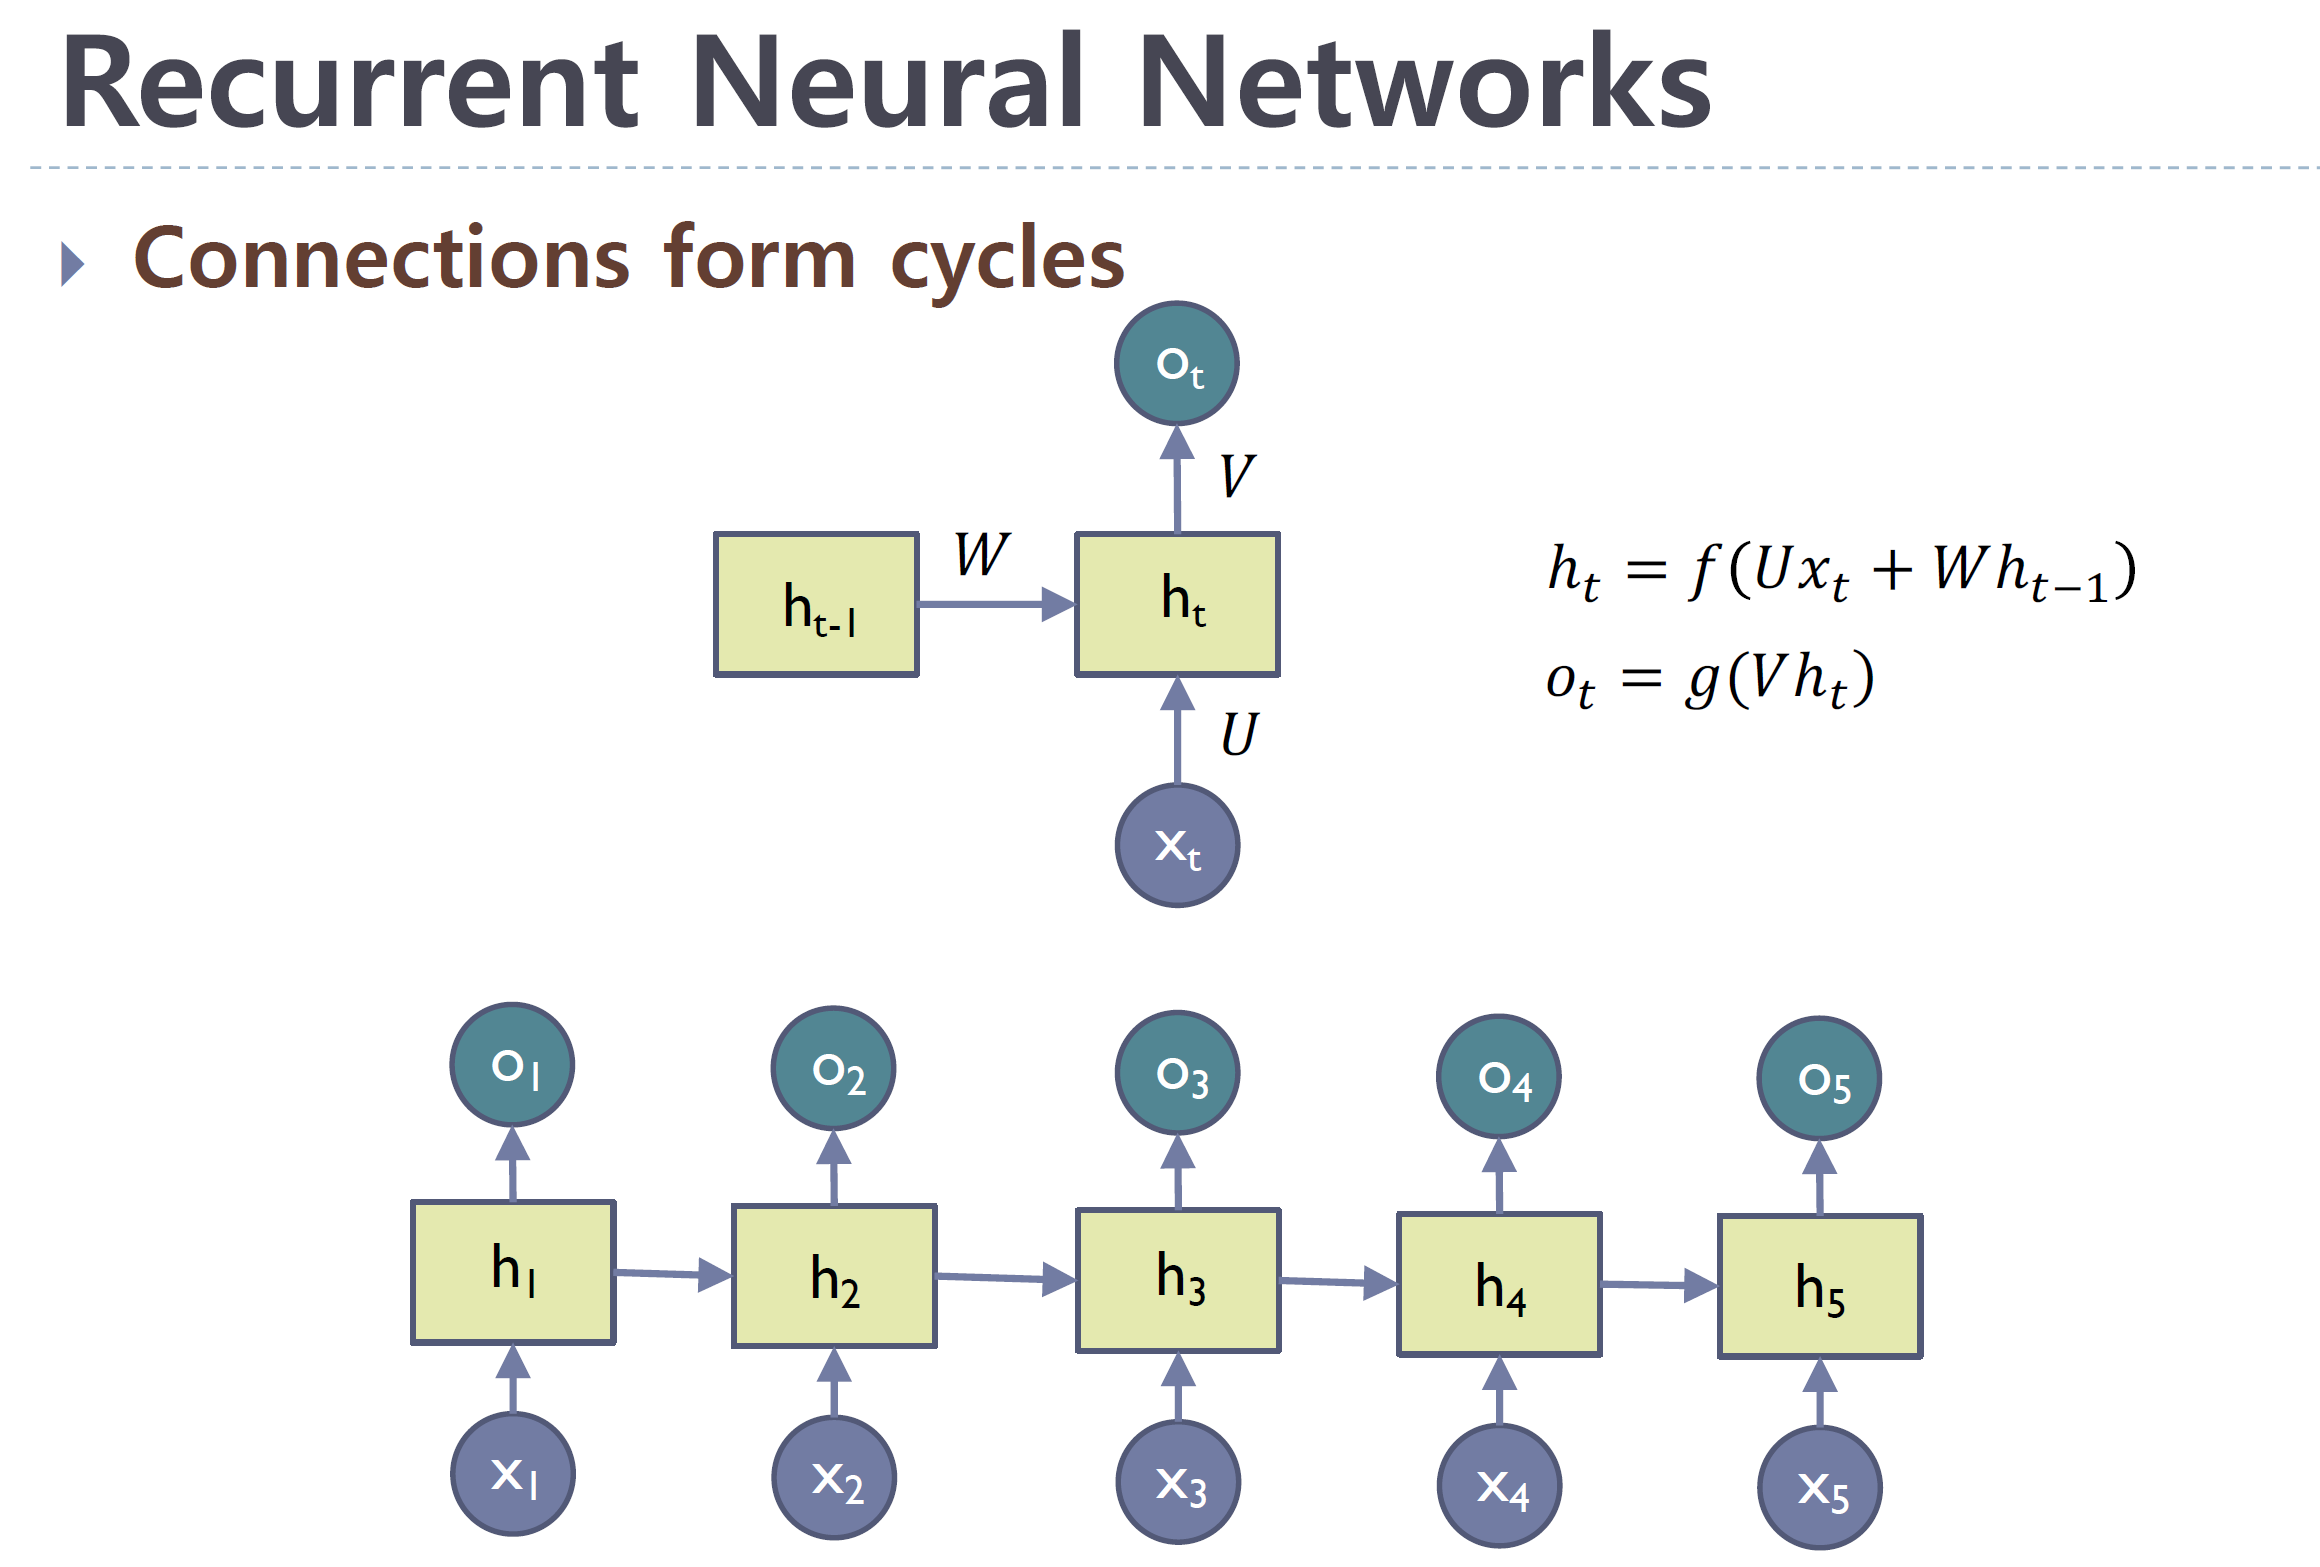

In [1]:
import torch
import numpy as np

# 1. RNN 모델의 입력 데이터 형태

- ![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbocVaf%2FbtqC48TSP1V%2Fgu9CyjxwKjUU8AtSVEyoYK%2Fimg.png)

In [2]:
# singleton example
# shape : (1, 1, 4)
# input_data_np = np.array([[[1, 0, 0, 0]]])

# sequential example
# shape : (3, 5, 4)
# (batch size, seq length, input_size)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l], 
                          [l, l, e, e, l]], dtype=np.float32)  # (3, 5, 4)

In [3]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)
input_data

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]])

# 2. RNN 모델 정의
- `input_size`: 입력해 주는 특성 값의 개수
- `hidden_size`: hidden state의 사이즈 지정. 보통 arbitrary 함.
- `batch_first`: 입력으로 받는 데이터의 shape중 첫 번째 차원을 batch로 간주할 것인지를 설정.
  - True: (batch, seq, feature)
  - False: (seq, batch, feature) 

## 2.1 Vanila RNN
![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbhdv8j%2FbtqC3NCHkYS%2FL5Y5s2WLKKfH9PlLxoy3w0%2Fimg.png)

In [4]:
# declare dimension
input_size = 4
hidden_size = 3
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # 처음에 batch_size or seq_length

In [5]:
input_data.shape

torch.Size([3, 5, 4])

In [6]:
# check output
outputs, _status = rnn(input_data)
# inputs: input, h_0 = 0 (num_layers*num_directions, batch, hidden_size)
print("outputs:\n", outputs)
print(outputs.size()) 
print()
# shape : (3, 5, 2)
# (batch_size, seq_length, hidden_dim)

print("hidden states:\n", _status)
print(_status.size()) 
# shape: (1, 3, 3)
# (num_layers, batch_size, hidden_dim)

outputs:
 tensor([[[-0.5328, -0.2615, -0.5484],
         [-0.0477,  0.4603,  0.2324],
         [-0.1025, -0.0884, -0.5547],
         [-0.0313,  0.4750,  0.0349],
         [-0.6392, -0.2067, -0.7392]],

        [[-0.1706,  0.1420, -0.4159],
         [-0.6087,  0.1341, -0.4679],
         [ 0.0440,  0.3540,  0.1750],
         [-0.1184, -0.0195, -0.5405],
         [-0.0212,  0.4525,  0.0117]],

        [[-0.1361,  0.1764, -0.3471],
         [-0.0255,  0.3094, -0.1537],
         [-0.0893,  0.1420, -0.4205],
         [-0.0572,  0.3273, -0.2041],
         [-0.0380,  0.1975, -0.3173]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 3])

hidden states:
 tensor([[[-0.6392, -0.2067, -0.7392],
         [-0.0212,  0.4525,  0.0117],
         [-0.0380,  0.1975, -0.3173]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


### Tracking the model parameters
- 신경망 내부의 많은 계층들은 매개변수화(parameterize) 됨.
- 학습 중에 최적화되는 가중치와 편향과 연관지어 짐.
- `named_parameters()`: 각 매개변수들을 순회하며(iterate), 매개변수의 크기와 값을 출력

In [7]:
[(name, param.shape) for name, param in rnn.named_parameters()]

[('weight_ih_l0', torch.Size([3, 4])),
 ('weight_hh_l0', torch.Size([3, 3])),
 ('bias_ih_l0', torch.Size([3])),
 ('bias_hh_l0', torch.Size([3]))]

## 2.2 LSTM
![image.png](https://miro.medium.com/max/1400/1*z7bEceNfH6X_N75HA9kyoA.webp)


In [8]:
lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
outputs, _status = lstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[ 3.4083e-02, -1.2803e-02, -3.6647e-02],
         [-3.9472e-02, -2.6191e-01, -9.3883e-02],
         [-6.9817e-02, -2.5521e-02, -2.3151e-02],
         [-1.0659e-01,  1.8049e-02,  7.7942e-04],
         [ 8.8082e-02, -1.2367e-01,  5.9135e-02]],

        [[-5.9749e-02, -2.6128e-01, -8.8432e-02],
         [ 1.3766e-01, -2.5912e-01,  4.3649e-02],
         [ 1.1060e-04, -2.8073e-02,  8.5158e-02],
         [-7.1296e-02,  9.7870e-03,  6.2446e-02],
         [-1.0259e-01,  2.3688e-02,  3.7582e-02]],

        [[-8.5282e-02,  2.5789e-02,  1.8381e-02],
         [-1.1431e-01,  3.2103e-02,  1.3419e-02],
         [-1.1920e-01, -2.5390e-01, -9.5889e-02],
         [-8.1307e-02, -3.3721e-01, -9.7307e-02],
         [-7.1609e-02, -4.3215e-02, -2.7074e-02]]],
       grad_fn=<TransposeBackward0>)
torch.Size([3, 5, 3])

tensor([[[ 0.0881, -0.1237,  0.0591],
         [-0.1026,  0.0237,  0.0376],
         [-0.0716, -0.0432, -0.0271]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


In [9]:
[(name, param.shape) for name, param in lstm.named_parameters()]

[('weight_ih_l0', torch.Size([12, 4])),
 ('weight_hh_l0', torch.Size([12, 3])),
 ('bias_ih_l0', torch.Size([12])),
 ('bias_hh_l0', torch.Size([12]))]

## 2.3 GRU
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Gated_Recurrent_Unit%2C_base_type.svg/1920px-Gated_Recurrent_Unit%2C_base_type.svg.png)
1. update gate
2. reset gate

In [10]:
gru = torch.nn.GRU(input_size, hidden_size, batch_first=True)
outputs, _status = gru(input_data)
print(outputs)
print(outputs.size())
print()

print(_status)
print(_status.size())

tensor([[[0.0428, 0.3248, 0.1001],
         [0.1575, 0.3639, 0.3689],
         [0.2115, 0.4288, 0.3878],
         [0.2488, 0.4575, 0.3949],
         [0.3991, 0.4732, 0.4862]],

        [[0.1367, 0.2350, 0.3066],
         [0.3358, 0.3435, 0.4313],
         [0.3440, 0.4144, 0.3999],
         [0.3457, 0.4471, 0.3890],
         [0.3451, 0.4620, 0.3856]],

        [[0.0939, 0.2214, 0.2309],
         [0.1631, 0.3546, 0.3269],
         [0.2553, 0.3790, 0.4893],
         [0.3307, 0.3899, 0.5808],
         [0.3493, 0.4428, 0.4717]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 3])

tensor([[[0.3991, 0.4732, 0.4862],
         [0.3451, 0.4620, 0.3856],
         [0.3493, 0.4428, 0.4717]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


In [11]:
[(name, param.shape) for name, param in gru.named_parameters()]

[('weight_ih_l0', torch.Size([9, 4])),
 ('weight_hh_l0', torch.Size([9, 3])),
 ('bias_ih_l0', torch.Size([9])),
 ('bias_hh_l0', torch.Size([9]))]

# 3. RNN을 이용한 분류기 구현
## Exercise. Apply RNN to image classification(MNIST).
- RNN을 이용해 MNIST 숫자 이미지 데이터셋을 분류하는 분류기를 구현
- MNIST와 같은 이미지 데이터는 이미지의 공간(spatial) 구조를 활용하는 CNN 모델이 더 적합함.
- 하지만 인접한 영역의 픽셀은 서로 연관되어 있으므로 이를 시퀀스 데이터로 볼 수도 있음
- 아래의 그림처럼 MNIST 데이터에서 28 x 28 픽셀을 시퀀스의 각원소는 28개의 픽셀을 가진 길이가 28 시퀀스 데이터로 볼 수 있음.

![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F996759475BD2ACEF18)


- root : 데이터의 경로를 넣는다.
- train : 테스트용 데이터를 가져올지 학습용 데이터를 가져올지 표시. True면 학습용 데이터.
- transform : 어떤 형태로 데이터를 불러올 지 설정.transform에 `transforms.ToTensor()`를 넣어서 일반 이미지(PIL image)를 pytorch tensor로 변환한다.
  - 일반 이미지는 0-255사이의 값을 갖고, (H, W, C)의 형태
  - pytorch는 0-1사이의 값을 가지고 (C, H, W)의 형태
- download : True로 설정하면 MNIST 데이터가 없으면 다운.

In [12]:
import torchvision
import torchvision.transforms as transforms

In [13]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./mnist', train=False, transform=transform)

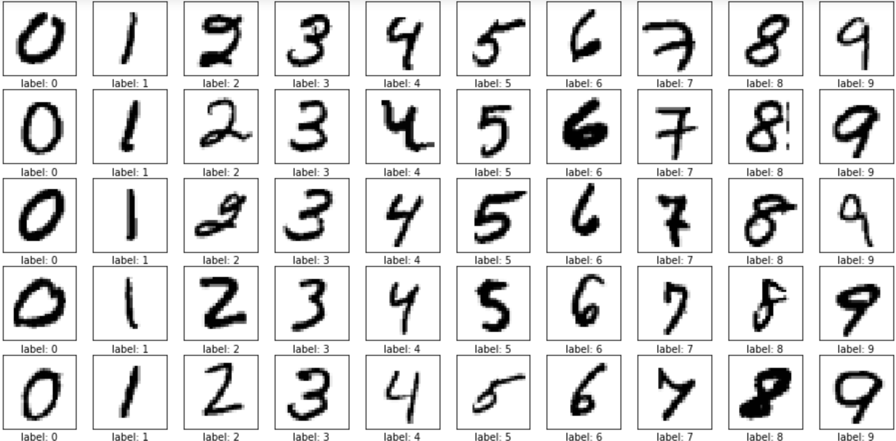

In [14]:
# 병렬처리를 위한 multiprocessing library
from multiprocessing import cpu_count

In [15]:
num_workers = int(cpu_count() / 2)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [16]:
class ImageRNN(torch.nn.Module):
    def __init__(self, batch_size, seq_length, input_size, hidden_size, num_classes, device):
        super(ImageRNN, self).__init__()
        self.batch_size = batch_size
        self.seq_length = seq_length
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

        # make rnn
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='tanh')
        # make fully-connected
        self.fc = torch.nn.Linear(seq_length*hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, self.seq_length, self.input_size)
        x, _hidden = self.rnn(x)
        x = x.reshape(-1, (self.seq_length * self.hidden_size))
        out = self.fc(x)

        return out

# 4. 연습문제
- Practice 1. Image를 RNN 모델의 input으로 할 때, `??`안의 파라미터를 정의하시오.
- Practice 2. practice1에서 정의한 파라미터로 train/test를 진행해보고 각각의 accuracy를 확인하시오.

In [17]:
# parameters
seq_length = ??
input_size = ?? 
hidden_size = 30
num_classes = ?? 
epochs = 5

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [19]:
import torch.optim as optim

In [20]:
from torch import nn

In [21]:
model = ImageRNN(batch_size, seq_length, input_size, hidden_size, num_classes, device).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
# %%time

for epoch in range(epochs):
    # Train
    model.train()
    
    train_loss = 0
    train_correct = 0
    
    for x, y in trainloader:
        optimizer.zero_grad() # torch에서는 bachward()호출 시 매번 gradient를 더해주는게 기본 설정이라서 이를 초기화해줘야 함.

        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
                
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_correct += predicted.eq(y).sum().item()
        
    train_loss = train_loss / len(trainloader)
    train_acc = train_correct / len(trainset)
        
    print('[%2d] TRAIN loss: %.3f, acc: %.3f' % (epoch+1, train_loss, train_acc))

[ 1] TRAIN loss: 0.081, acc: 0.976
[ 2] TRAIN loss: 0.073, acc: 0.978
[ 3] TRAIN loss: 0.068, acc: 0.979
[ 4] TRAIN loss: 0.065, acc: 0.980
[ 5] TRAIN loss: 0.060, acc: 0.981


In [34]:
# Test
model.eval()

test_loss = 0
test_correct = 0
test_preds = []

with torch.no_grad():
    for i, (x, y) in enumerate(testloader):
        x = x.view(-1, 28, 28)
        
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
        
        test_loss += loss.item()
        _, predicted = outputs.max(1)
        test_correct += predicted.eq(y).sum().item()
        
        if i == 0:
            test_preds = predicted
        else:
            test_preds = torch.cat((test_preds, predicted), dim=0)
            
test_preds = test_preds.cpu()

print('TEST loss: %.4f, acc: %.4f' % (test_loss/len(testloader), test_correct/len(testset)))

TEST loss: 0.0720, acc: 0.9774


In [35]:
print(test_preds[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])


In [36]:
print(testset.targets[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])
